In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# import warnings
# warnings.filterwarnings("ignore")


In [2]:
## Load and Inspect Dataset

# Load the CSV file
df = pd.read_csv("new_train_EGN5442.csv")

In [3]:
# Display basic info
df.info()
print("Shape:", df.shape)
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104722 entries, 0 to 104721
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  104722 non-null  int64  
 1   y           104722 non-null  int64  
 2   x2          104722 non-null  object 
 3   x3          104722 non-null  object 
 4   x5          104722 non-null  int64  
 5   x9          104722 non-null  int64  
 6   x10         104722 non-null  int64  
 7   x11         104722 non-null  int64  
 8   x12         104722 non-null  int64  
 9   x13         104722 non-null  int64  
 10  x14         104722 non-null  object 
 11  x15         104722 non-null  int64  
 12  x16         104722 non-null  int64  
 13  x17         104722 non-null  int64  
 14  x18         104722 non-null  int64  
 15  x19         104722 non-null  int64  
 16  x20         104722 non-null  int64  
 17  x21         104722 non-null  int64  
 18  x22         104722 non-null  int64  
 19  x2

In [4]:
# Display column summary for dtype, unique values, and null count
for c in df.columns:
    print(c, " | dtype:", df[c].dtype, "| nunique:", df[c].nunique(), "| nulls:", df[c].isnull().sum())

Unnamed: 0  | dtype: int64 | nunique: 104722 | nulls: 0
y  | dtype: int64 | nunique: 2 | nulls: 0
x2  | dtype: object | nunique: 103904 | nulls: 0
x3  | dtype: object | nunique: 2 | nulls: 0
x5  | dtype: int64 | nunique: 75 | nulls: 0
x9  | dtype: int64 | nunique: 6 | nulls: 0
x10  | dtype: int64 | nunique: 6 | nulls: 0
x11  | dtype: int64 | nunique: 6 | nulls: 0
x12  | dtype: int64 | nunique: 6 | nulls: 0
x13  | dtype: int64 | nunique: 6 | nulls: 0
x14  | dtype: object | nunique: 6 | nulls: 0
x15  | dtype: int64 | nunique: 6 | nulls: 0
x16  | dtype: int64 | nunique: 6 | nulls: 0
x17  | dtype: int64 | nunique: 6 | nulls: 0
x18  | dtype: int64 | nunique: 6 | nulls: 0
x19  | dtype: int64 | nunique: 5 | nulls: 0
x20  | dtype: int64 | nunique: 6 | nulls: 0
x21  | dtype: int64 | nunique: 6 | nulls: 0
x22  | dtype: int64 | nunique: 6 | nulls: 0
x23  | dtype: int64 | nunique: 446 | nulls: 0
x24  | dtype: float64 | nunique: 455 | nulls: 312
x25  | dtype: object | nunique: 2 | nulls: 0
x26  | d

In [5]:
## Display Unique Values for Each Column

# Use pandas apply() to show unique values per column
df.apply(pd.unique)

Unnamed: 0    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
y                                                        [1, 0]
x2            [#54359, #84649, #59015, #99990, #83569, #91, ...
x3                                               [Female, Male]
x5            [50, 44, 72, 38, 37, 41, 11, 58, 12, 22, 28, 4...
x9                                           [5, 1, 3, 2, 4, 0]
x10                                          [5, 1, 3, 2, 4, 0]
x11                                          [5, 1, 2, 0, 3, 4]
x12                                          [4, 1, 5, 3, 2, 0]
x13                                          [3, 5, 2, 1, 4, 0]
x14                                          [5, 3, 2, 1,  , 4]
x15                                          [3, 1, 2, 5, 4, 0]
x16                                          [3, 4, 5, 2, 1, 0]
x17                                          [4, 3, 2, 5, 1, 0]
x18                                          [5, 4, 3, 2, 1, 0]
x19                                     

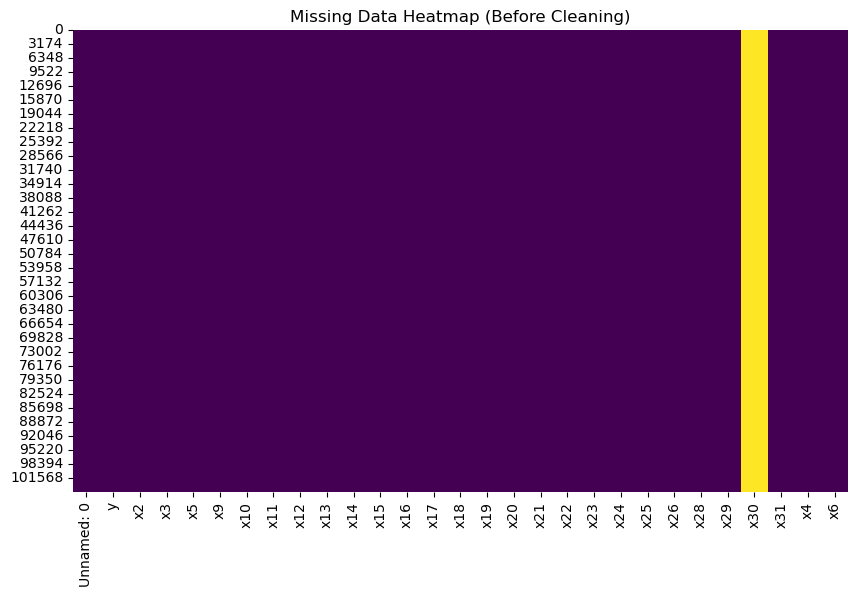

In [6]:
## Visualizing Missing Data (Before Cleaning)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (Before Cleaning)')
plt.show()

In [7]:
## Cleaning Process

# Check unique values in specific columns
df[['x4','x30']].nunique()


# Drop unnecessary or constant columns
df.drop(columns=['Unnamed: 0', 'x30', 'x4'], inplace=True)


# Fill missing categorical (x14) with mode
if df['x14'].isnull().sum() > 0:
    df['x14'].fillna(df['x14'].mode()[0], inplace=True)


# Fill missing numeric (x24) with median
df['x24'].fillna(df['x24'].median(), inplace=True)


# Replace inf/-inf in x31 with NaN, then fill with median
df['x31'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['x31'].fillna(df['x31'].median(), inplace=True)


# Clean x29 — extract numeric values like "(192&&)" → 192
if 'x29' in df.columns:
    df['x29'] = df['x29'].astype(str).str.extract(r'(\d+)')[0]
    df['x29'] = pd.to_numeric(df['x29'], errors='coerce')


# Encode Sex (x3): Female = 1, Male = 0
df['x3'] = df['x3'].apply(lambda x: 1 if str(x).lower() == 'female' else 0)


# Label encode other categorical columns
cat_cols = ['x2', 'x14', 'x25', 'x26']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

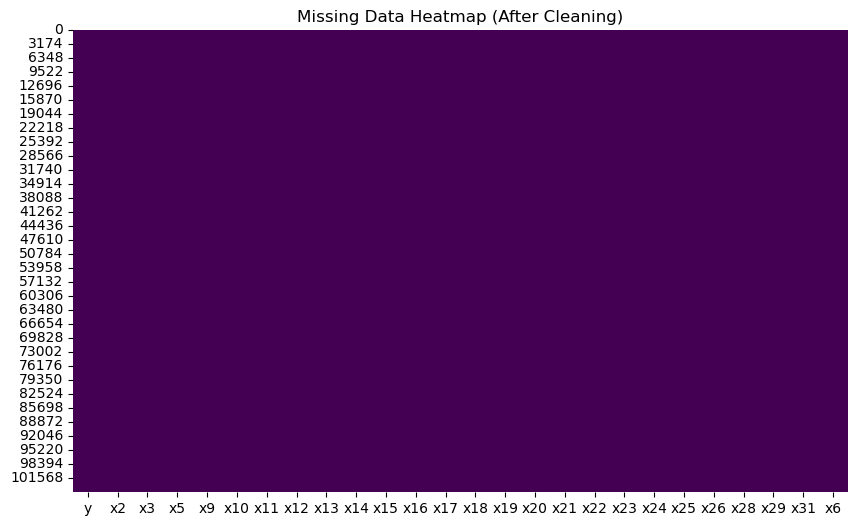

In [8]:
## Visualizing Missing Data (After Cleaning)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (After Cleaning)')
plt.show()

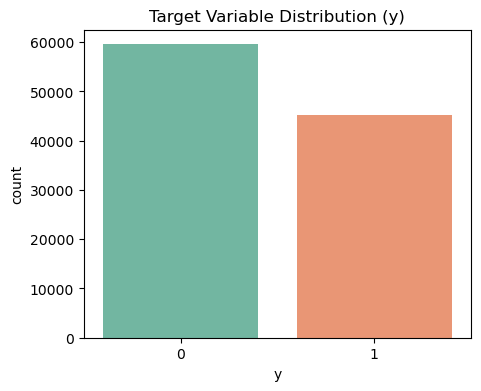

In [9]:
## Check Class Balance

plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Target Variable Distribution (y)')
plt.show()

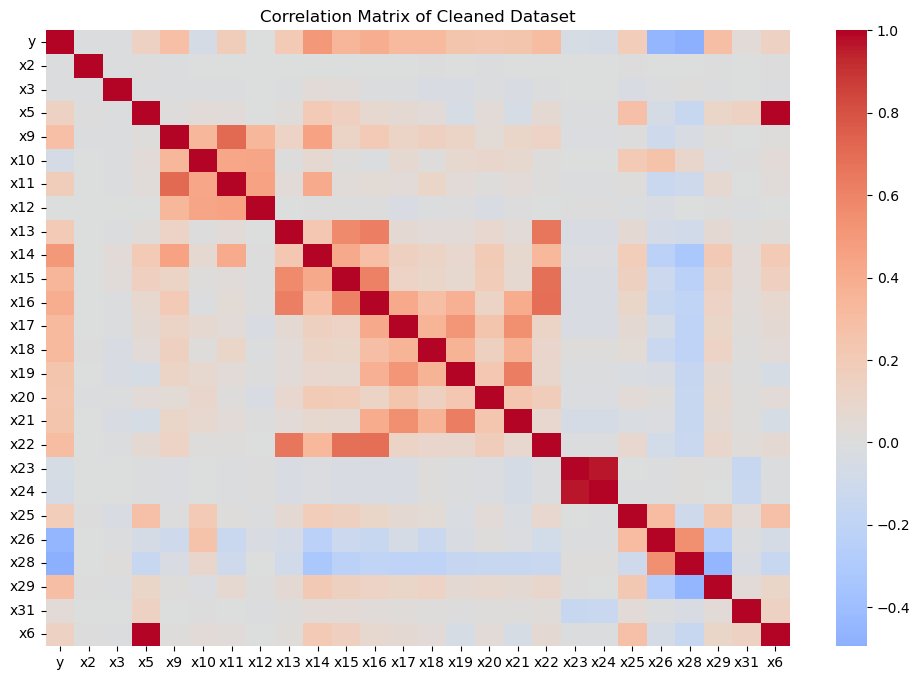

In [10]:
## Correlation Matrix

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cleaned Dataset')
plt.show()

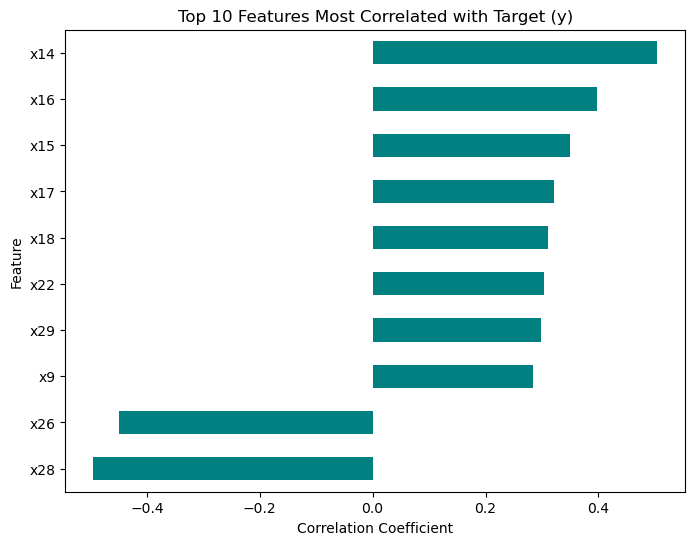

In [11]:
## Top Features Correlated with Target

# Compute correlation with target variable
corr_with_y = df.corr()['y'].drop('y').sort_values(key=abs, ascending=False)

# Plot top 10 correlated features
plt.figure(figsize=(8,6))
corr_with_y.head(10).sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Features Most Correlated with Target (y)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

In [12]:
## Summary Output

print("Missing values after cleaning:\n", df.isnull().sum().sum())
print("Dataset shape after cleaning:", df.shape)
print("Class balance (%):\n", df['y'].value_counts(normalize=True) * 100)

Missing values after cleaning:
 0
Dataset shape after cleaning: (104722, 26)
Class balance (%):
 y
0    56.861977
1    43.138023
Name: proportion, dtype: float64


PART A-Logistic Regression Model

In [13]:
## Data Preparation

# Separate features (X) and target (y)
X = df.drop(columns='y')
y = df['y']

In [14]:
## Train-Test Split (80% Train, 20% Test)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train/test shapes:", X_train.shape, X_test.shape)

Train/test shapes: (83777, 25) (20945, 25)


In [15]:
## Data Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
## Initial Logistic Regression Model (Baseline)

# Train baseline model
log_model = LogisticRegression(max_iter=5000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Evaluate baseline accuracy
y_predict = log_model.predict(X_test_scaled)
log_model_score = log_model.score(X_test_scaled, y_test)
print("Baseline Accuracy:", round(log_model_score, 3))

Baseline Accuracy: 0.874


In [17]:
## Logistic Regression with RandomizedSearchCV (Hyperparameter Tuning)

param_dist = [
{'solver': ['lbfgs'], 'penalty': ['l2', 'none'], 'C': np.logspace(-4,4,20)},
{'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': np.logspace(-4,4,20)},
{'solver': ['saga'], 'penalty': ['l1','l2','elasticnet','none'], 'C': np.logspace(-4,4,20), 'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]}
]

random_search = RandomizedSearchCV(
estimator=LogisticRegression(max_iter=5000, random_state=42),
param_distributions=param_dist,
n_iter=40,
scoring='roc_auc',
cv=5,
verbose=1,
random_state=42,
n_jobs=-1,
error_score=np.nan
)

random_search.fit(X_train_scaled, y_train)
print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/alex._choo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alex._choo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alex._choo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alex._choo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alex._choo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

Best params: {'solver': 'saga', 'penalty': 'l1', 'l1_ratio': 0.0, 'C': 0.012742749857031334}


In [18]:
## Evaluate the Best Model

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

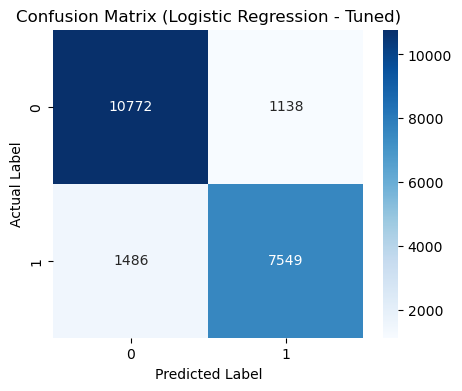

In [19]:
## Confusion Matrix

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression - Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

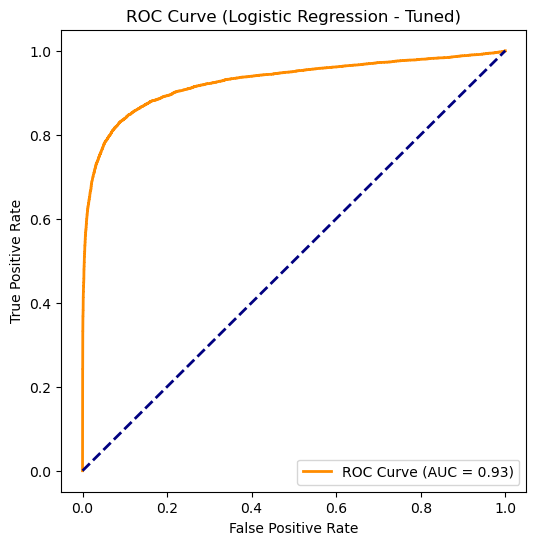

In [20]:
## ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression - Tuned)')
plt.legend(loc="lower right")
plt.show()

In [21]:
## Final Results Summary

print({
"Accuracy": round(accuracy, 4),
"Precision": round(precision, 4),
"Recall": round(recall, 4),
"F1 Score": round(f1, 4),
"ROC/AUC": round(roc_auc, 4)
})

{'Accuracy': 0.8747, 'Precision': 0.869, 'Recall': 0.8355, 'F1 Score': 0.8519, 'ROC/AUC': 0.9271}


PART B -Non-logistic Model(s)


In [22]:
## Baseline Gradient Boosting Classifier (Un-tuned)

gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train_scaled, y_train)

y_pred_base = gbc_model.predict(X_test_scaled)
y_prob_base = gbc_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_base = auc(*roc_curve(y_test, y_prob_base)[:2])

print("Baseline GBC (default) ROC AUC:", round(roc_auc_base, 4))

Baseline GBC (default) ROC AUC: 0.9881


In [23]:
## Hyperparameter Tuning with GridSearchCV

param_grid = {
'loss': ['log_loss', 'exponential'],
'learning_rate': [0.001, 0.01, 0.1],
'n_estimators': [10, 100]
}

gbc_grid = GridSearchCV(
estimator=GradientBoostingClassifier(random_state=42),
param_grid=param_grid,
scoring='roc_auc',
cv=5,
n_jobs=-1,
verbose=2,
error_score=np.nan
)

gbc_grid.fit(X_train_scaled, y_train)

print("Best params from GridSearchCV:", gbc_grid.best_params_)
best_gbc = gbc_grid.best_estimator_
print("Best estimator:", best_gbc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END learning_rate=0.001, loss=log_loss, n_estimators=10; total time=   1.9s
[CV] END learning_rate=0.001, loss=log_loss, n_estimators=10; total time=   2.0s
[CV] END learning_rate=0.001, loss=log_loss, n_estimators=10; total time=   2.0s
[CV] END learning_rate=0.001, loss=log_loss, n_estimators=10; total time=   2.0s
[CV] END learning_rate=0.001, loss=log_loss, n_estimators=10; total time=   2.1s
[CV] END learning_rate=0.001, loss=exponential, n_estimators=10; total time=   2.0s
[CV] END learning_rate=0.001, loss=exponential, n_estimators=10; total time=   2.0s
[CV] END learning_rate=0.001, loss=exponential, n_estimators=10; total time=   2.0s
[CV] END learning_rate=0.001, loss=exponential, n_estimators=10; total time=   2.1s
[CV] END learning_rate=0.001, loss=exponential, n_estimators=10; total time=   2.0s
[CV] END learning_rate=0.001, loss=log_loss, n_estimators=100; total time=  20.0s
[CV] END learning_rate=0.001, lo

In [24]:
## Evaluate the Best Model
y_pred = best_gbc.predict(X_test_scaled)
y_prob = best_gbc.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("\nEvaluation (Best GBC):")
print({
"Accuracy": round(accuracy, 4),
"Precision": round(precision, 4),
"Recall": round(recall, 4),
"F1 Score": round(f1, 4),
"ROC/AUC": round(roc_auc, 4)
})


Evaluation (Best GBC):
{'Accuracy': 0.9431, 'Precision': 0.9432, 'Recall': 0.9237, 'F1 Score': 0.9333, 'ROC/AUC': 0.9886}


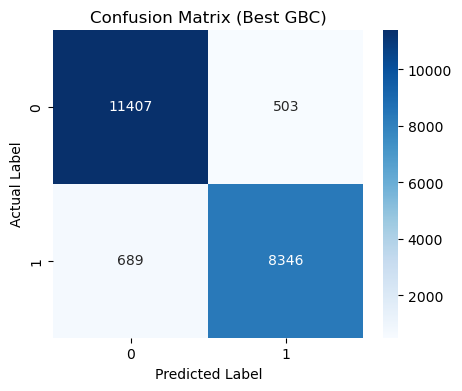

In [25]:
## Confusion Matrix Plot

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Best GBC)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

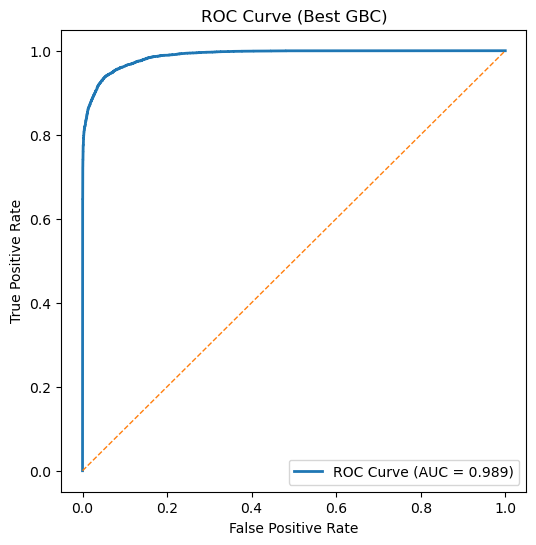

In [26]:
## ROC Curve Plot

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Best GBC)')
plt.legend(loc="lower right")
plt.show()

In [27]:
# Export the cleaned dataset to a new CSV file
df.to_csv("cleaned_new_train_EGN5442.csv", index=False)

print("Clean dataset exported successfully!")


Clean dataset exported successfully!
